In [1]:
# Install necessary libraries (if needed)
!pip install pandas matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Upload files
from google.colab import files
uploaded = files.upload()

Saving bmi_age.xlsx to bmi_age (2).xlsx
Saving insurance.xlsx to insurance (1).xlsx


In [12]:
# Load the Excel file (change filename accordingly)
bmi_age = pd.read_excel("bmi_age.xlsx")
insurance = pd.read_excel("insurance.xlsx")

# Save as CSV
bmi_age.to_csv("bmi_age.csv", index=False)
insurance.to_csv("insurance.csv", index=False)

In [14]:
# Load the datasets
bmi_age = pd.read_csv("bmi_age.csv")
insurance = pd.read_csv("insurance.csv")


In [20]:
# Concatenate column-wise if rows align
data = pd.concat([insurance, bmi_age], axis=1)

# Preview the final dataframe
data.head()


,Policy no.,children,smoker,region,Policy no.,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,PLC156898,19,female,27.900,16884.92400
1,PLC157033,1,no,southwest,PLC156907,18,male,33.770,1725.55230
2,PLC157060,0,no,southwest,PLC156916,28,male,33.000,4449.46200
3,PLC157087,1,no,southwest,PLC156925,33,male,22.705,21984.47061
4,PLC157186,5,no,southwest,PLC156934,32,male,28.880,3866.85520


In [22]:
print(data.columns.tolist())


['Policy no.', 'children', 'smoker', 'region', 'Policy no.', 'age', 'sex', 'bmi', 'charges in INR']


## **Exploratory Data Analysis**

**1. Does gender matter for extending policies?**

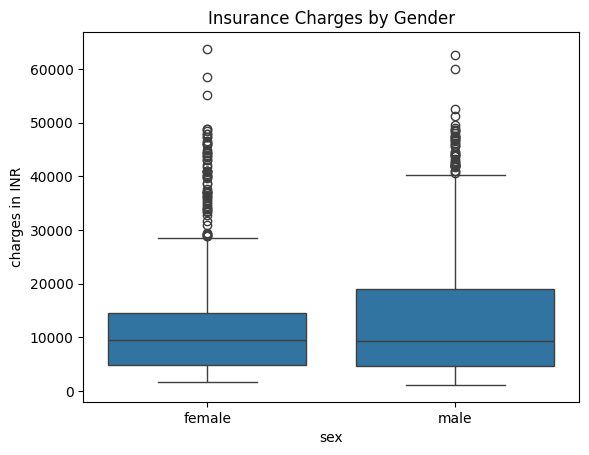

        count          mean           std        min        25%         50%  \
sex                                                                           
female  662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309  


In [23]:

sns.boxplot(x='sex', y='charges in INR', data=data)
plt.title("Insurance Charges by Gender")
plt.show()

# Optional: Group stats
print(data.groupby('sex')['charges in INR'].describe())


**2. Average amount spent per policy cover**


In [24]:
average_spent = data['charges in INR'].mean()
print("Average amount spent per policy cover:", round(average_spent, 2))


Average amount spent per policy cover: 13270.42


**3. Should company offer policies by geographic location?**


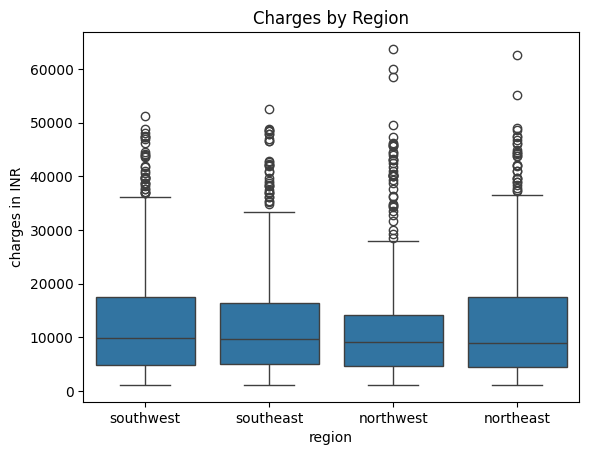

region
northeast    13498.240910
northwest    12868.834519
southeast    13051.349910
southwest    13690.253385
Name: charges in INR, dtype: float64


In [25]:
sns.boxplot(x='region', y='charges in INR', data=data)
plt.title("Charges by Region")
plt.show()

# Region-wise average
print(data.groupby('region')['charges in INR'].mean())


**4. Dependents vs Claim Amount**


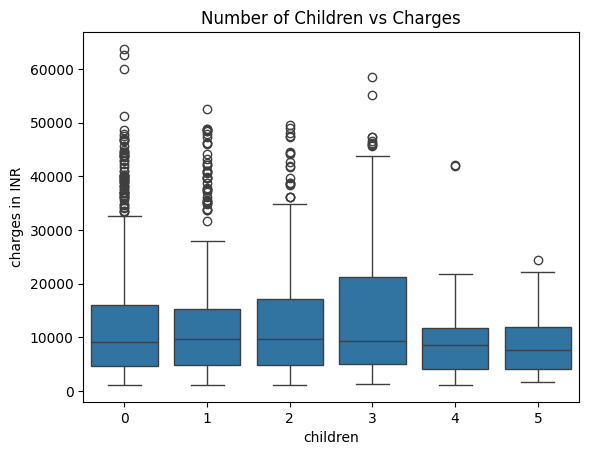

children
0    13062.129999
1    13270.957148
2    13157.532550
3    15135.961208
4    10476.381580
5     9017.166323
Name: charges in INR, dtype: float64


In [26]:
sns.boxplot(x='children', y='charges in INR', data=data)
plt.title("Number of Children vs Charges")
plt.show()

print(data.groupby('children')['charges in INR'].mean())


**5. BMI correlation with insurance claim**


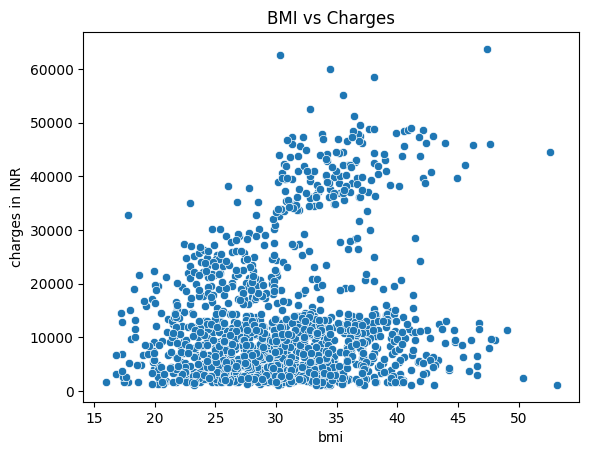

Correlation between BMI and Charges: 0.19834096883362895


In [27]:
sns.scatterplot(x='bmi', y='charges in INR', data=data)
plt.title("BMI vs Charges")
plt.show()

correlation = data['bmi'].corr(data['charges in INR'])
print("Correlation between BMI and Charges:", correlation)


**6. Smoker vs Non-Smoker**


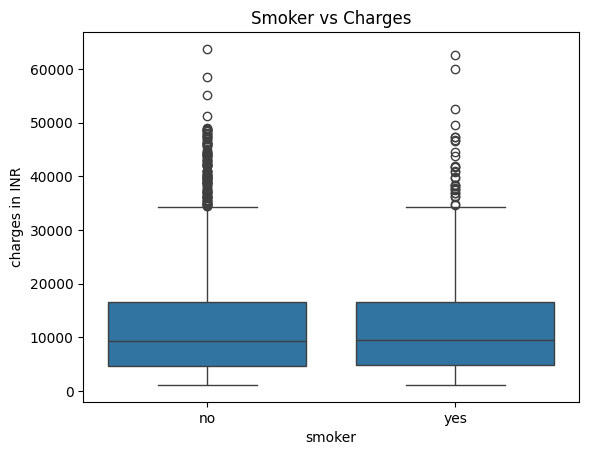

smoker
no     13239.046948
yes    13392.259265
Name: charges in INR, dtype: float64


In [28]:
sns.boxplot(x='smoker', y='charges in INR', data=data)
plt.title("Smoker vs Charges")
plt.show()

print(data.groupby('smoker')['charges in INR'].mean())


**7. Does age influence claim amount?**

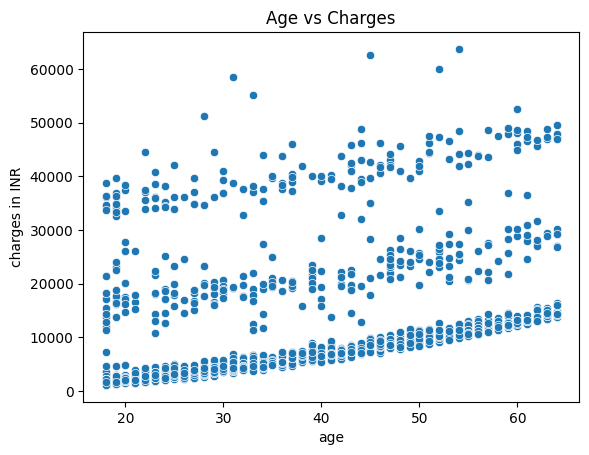

Correlation between Age and Charges: 0.29900819333064754


In [29]:
sns.scatterplot(x='age', y='charges in INR', data=data)
plt.title("Age vs Charges")
plt.show()

correlation = data['age'].corr(data['charges in INR'])
print("Correlation between Age and Charges:", correlation)


**8. Should discounts be based on BMI?**

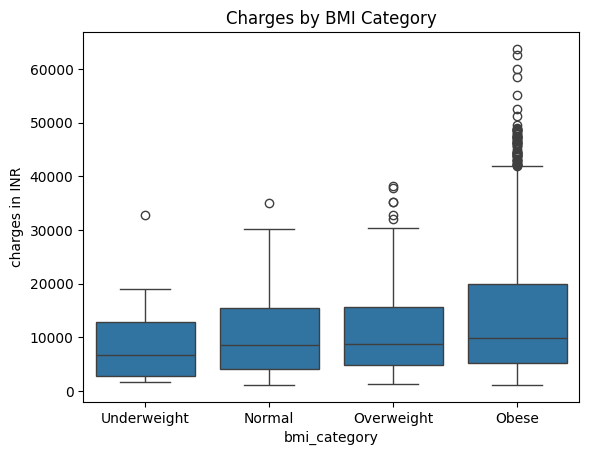

bmi_category
Underweight     8657.620652
Normal         10404.900084
Overweight     11006.809989
Obese          15491.542238
Name: charges in INR, dtype: float64


<ipython-input-30-a6cb40c64887>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('bmi_category')['charges in INR'].mean())


In [30]:
bmi_range = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
data['bmi_category'] = bmi_range
sns.boxplot(x='bmi_category', y='charges in INR', data=data)
plt.title("Charges by BMI Category")
plt.show()

print(data.groupby('bmi_category')['charges in INR'].mean())
